### New York airbnb data storytelling summary

In [1]:
#Import the necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns

### Data input

In [2]:
data=pd.read_csv('airbnb.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0


### Data storytelling: price related factors are analyzed in the following order:
#### 1. neighbourhood_group  
#### 2. neighbourhood
#### 3. room_type
#### 4. number_of_reviews

#### Let' s check the first factor 'neighbourhood_group'.

In [3]:
#examine unique value
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

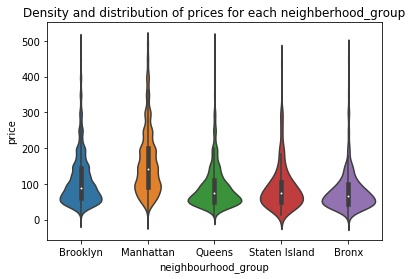

In [4]:
#Visualize the average price between different neighbourhood_group.
data1=data[data.price<500]
viz_1=sns.violinplot(data=data1,x='neighbourhood_group',y='price')
viz_1.set_title('Density and distribution of prices for each neighberhood_group')

#### Combined the table and the violin figure, the distribtuion of prices for airbnb in NYC has indicated that Manhattan has the highest price at average 150, then is Brooklyn with 90. The Bronx is the cheapest one with 65$.

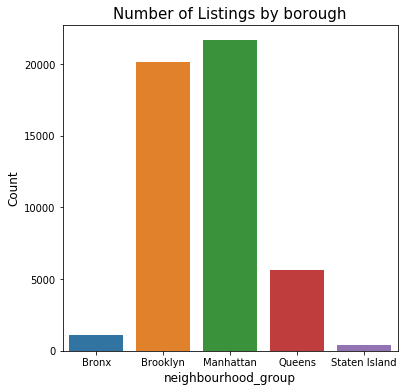

In [5]:
#Neighbourhood_group listing count
nb_count=data.groupby('neighbourhood_group').agg('count').reset_index()
#plot the count
fig, ax1=plt.subplots(1,1,figsize=(6,6))
sns.barplot(x='neighbourhood_group',y='id',data=nb_count, ax=ax1)
ax1.set_title('Number of Listings by borough', fontsize=15)
ax1.set_xlabel('neighbourhood_group', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

#### Comments: the neighbourhood_group "Manhattan" exhibited the highest number of listings.

In [9]:
#Draw the price map based on different neighbourhood_groups.
#Geopandas brings in the NYC map.
import os
import geopandas as gpd
from shapely import wkt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('fivethirtyeight')

In [10]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


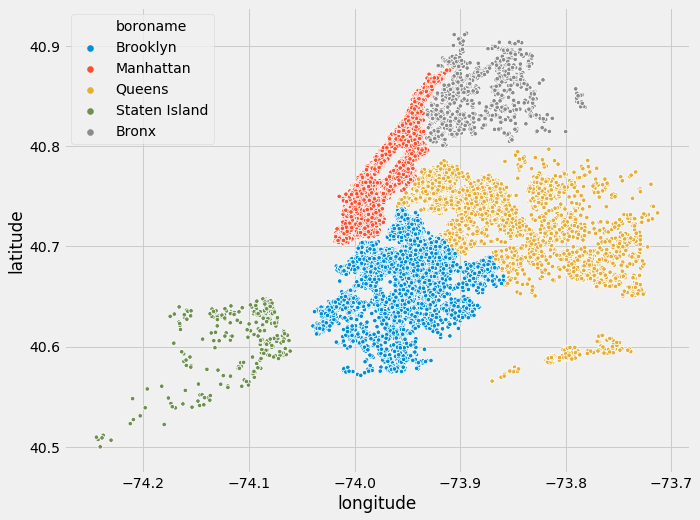

In [13]:
#Visualize the neighbourhood_group distribution of all the airbnb in New York
data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude',y='latitude',hue='boroname',s=20,data=data)

In [15]:
borough_count=data.groupby('boroname').agg('count').reset_index()

In [20]:
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')
bc_geo.head()

,BoroCode,boroname,Shape_Leng,Shape_Area,geometry,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091


Text(0.5, 1, 'Number of Airbnb Listings by NYC Borough')

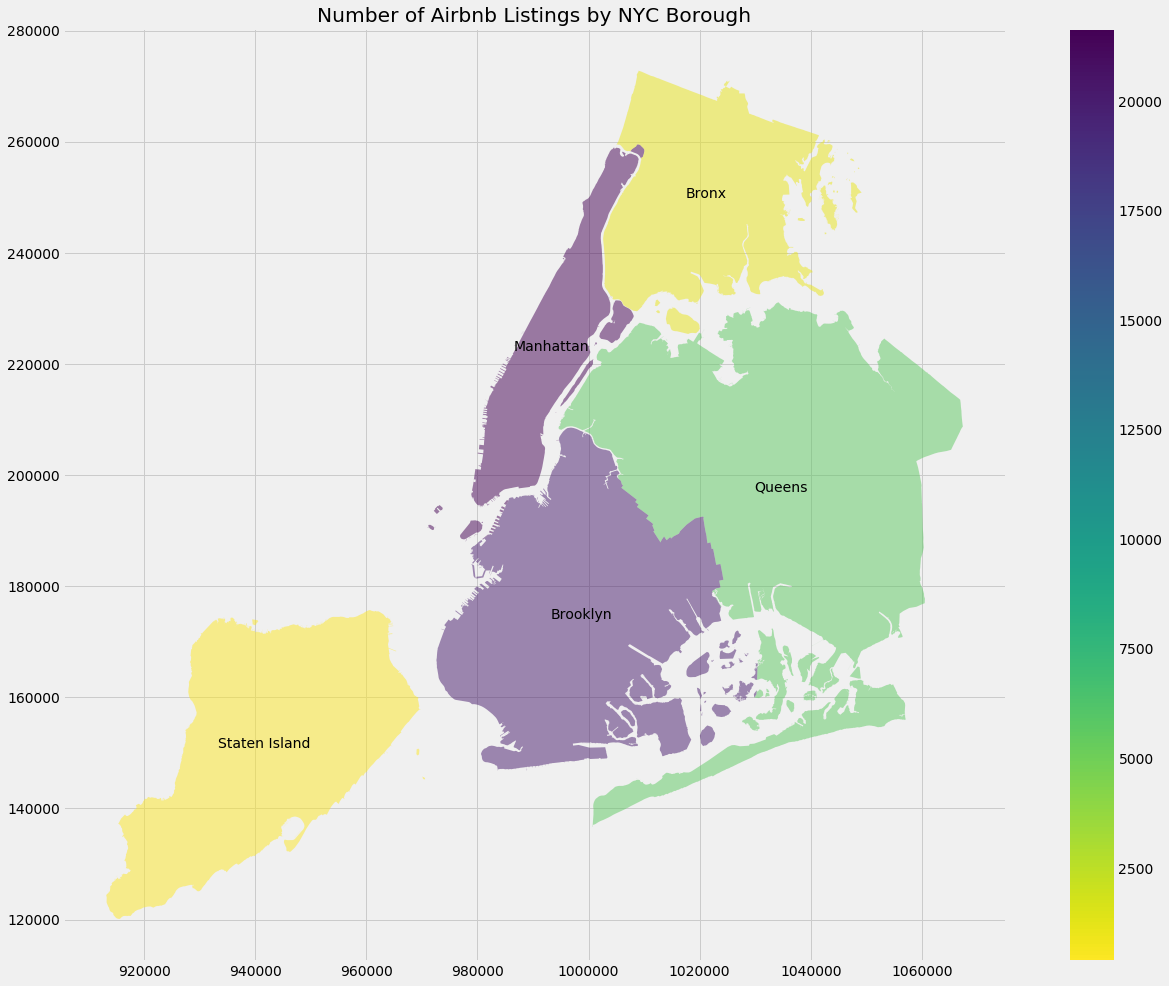

In [19]:
import descartes
from matplotlib.collections import PatchCollection
fig, ax=plt.subplots(1,1,figsize=(20,16))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)
bc_geo.apply(lambda x:ax.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title('Number of Airbnb Listings by NYC Borough')

### Let' s check the second factor 'neighbourhood'

In [21]:
#Let's get a count by neighbourhood
nbhood_count=data.groupby('neighbourhood').agg('count').reset_index

In [22]:
nbhoods=pd.read_csv('nynta.csv')
nbhoods.head(5)

,BoroCode,BoroName,the_geom,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,3,Brooklyn,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,BK88,Borough Park,39247.227831,5.400502e+07
1,4,Queens,MULTIPOLYGON (((-73.80379022888098 40.77561011...,81,QN51,Murray Hill,33266.904797,5.248828e+07
2,4,Queens,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,QN27,East Elmhurst,19816.712074,1.972685e+07
3,4,Queens,MULTIPOLYGON (((-73.75725671509139 40.71813860...,81,QN07,Hollis,20976.335574,2.288777e+07
4,1,Manhattan,MULTIPOLYGON (((-73.94607828674226 40.82126321...,61,MN06,Manhattanville,17040.685413,1.064708e+07


In [24]:
nbhoods.rename(columns={'NTSName':'neighbourhood'},inplace=True)
#apply the geometry correctly
nbhoods['geom']=nbhoods['the_geom'].apply(wkt.loads)
nbhoods=gpd.GeoDataFrame(nbhoods, geometry='geom')

In [25]:
data=gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
joined=pd.DataFrame.join(nbhoods,data,how='inner')
joined.head(3)

,BoroCode,BoroName,the_geom,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geom,id,...,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,3,Brooklyn,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,BK88,Borough Park,39247.227831,5.400502e+07,(POLYGON ((-73.97604935657381 40.6312759056467...,2539,...,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365,POINT (-73.97237 40.64749)
1,4,Queens,MULTIPOLYGON (((-73.80379022888098 40.77561011...,81,QN51,Murray Hill,33266.904797,5.248828e+07,(POLYGON ((-73.80379022888098 40.7756101122950...,2595,...,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355,POINT (-73.98376999999999 40.75362)
2,4,Queens,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,QN27,East Elmhurst,19816.712074,1.972685e+07,(POLYGON ((-73.86109724401859 40.7636644770877...,3647,...,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.9419 40.80902)


(-74.28337047814922, -73.67222994821336, 40.4751445260767, 40.93650364609704)

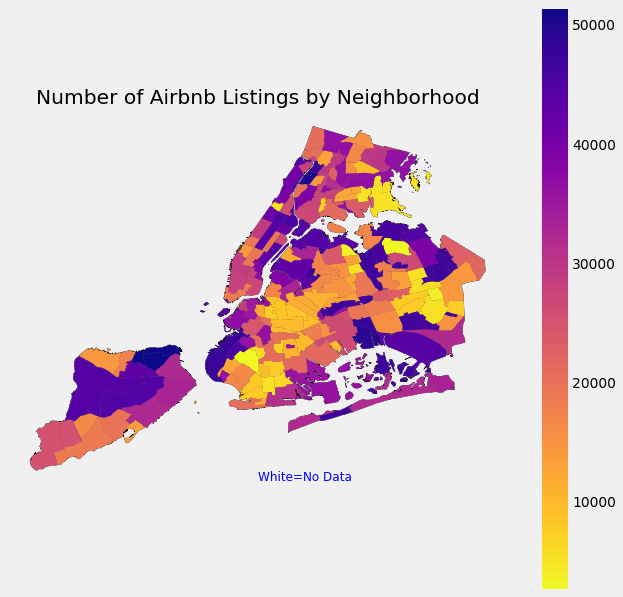

In [26]:
fig, ax=plt.subplots(1,1, figsize=(10,10))
base=nbhoods.plot(color='white', edgecolor='black', ax=ax)
joined.plot(column='id',cmap='plasma_r', ax=base, legend=True)
plt.title('Number of Airbnb Listings by Neighborhood')
ax.text(0.5,0.01, 'White=No Data',verticalalignment='bottom', horizontalalignment='left', transform=ax.transAxes,
        color='blue', fontsize=12)
plt.axis('off')

In [27]:
#Let' s find out the neighbourhood of the top 10 listings.
data.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [29]:
#combine the neighbourhood with price to analyze the data.
data_nb=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side',
                                           'Hell\'s Kitchen','East Village','Upper East Side','Crown Heights',
                                           'Midtown'])]
data_nb.head()

,id,name,host_id,host_name,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355,POINT (-73.98376999999999 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.9419 40.80902)
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/17,0.40,1,0,POINT (-73.95596 40.68688)
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/19,3.47,1,220,POINT (-73.98493000000001 40.76489)
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/17,0.99,1,0,POINT (-73.96723 40.80178)


In [57]:
#Let' s find out the average price for these neighbourhood
data2=data_nb.groupby('neighbourhood').price.mean().reset_index()
data2

,neighbourhood,price
0,Bedford-Stuyvesant,107.678244
1,Bushwick,84.800406
2,Crown Heights,112.480179
3,East Village,186.083108
4,Harlem,118.974041
5,Hell's Kitchen,204.794178
6,Midtown,282.719094
7,Upper East Side,188.948276
8,Upper West Side,210.918316
9,Williamsburg,143.802806


#### In these top 10 listings neighbourhood, the average price ($) range from 84 to 282 , which are higher than the price of average neighbourhood_group.

[Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'East Village'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, "Hell's Kitchen"),
 Text(0, 0, 'Midtown'),
 Text(0, 0, 'Upper East Side'),
 Text(0, 0, 'Upper West Side'),
 Text(0, 0, 'Williamsburg')]

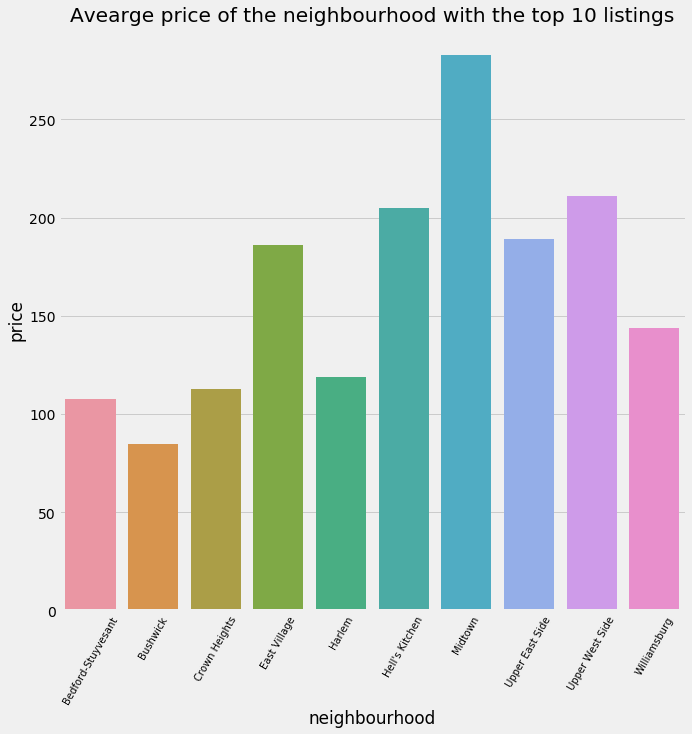

In [63]:
#Plot the average price data 
fig, ax1=plt.subplots(1,1,figsize=(10,10))
sns.barplot(x='neighbourhood', y='price', data=data2)
ax1.set_title('Avearge price of the neighbourhood with the top 10 listings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60,fontsize=10)

<Figure size 1080x432 with 0 Axes>

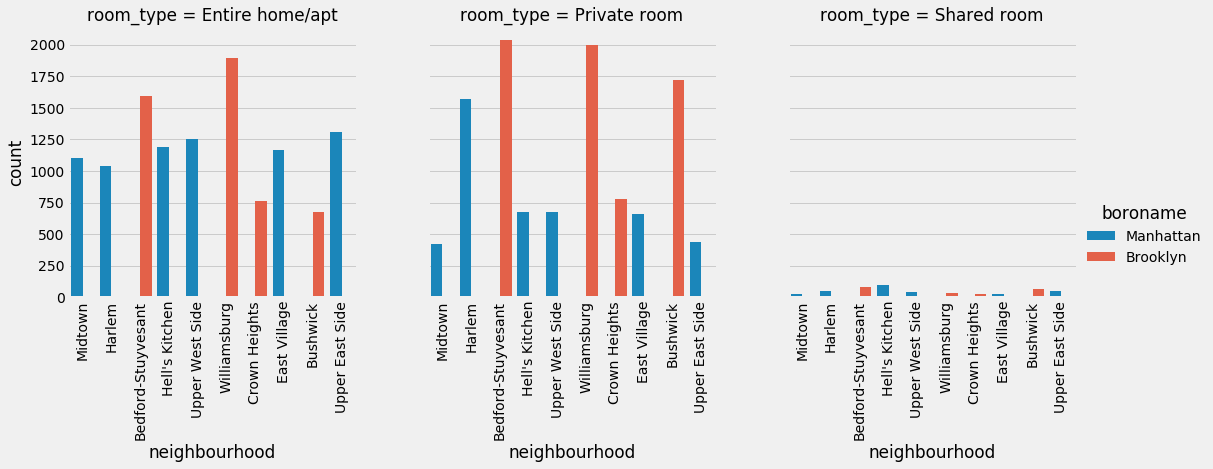

In [73]:
### Let' s check if 'room_type' has influenced the price.
plt.figure(figsize=(15,6))
ax1=sns.catplot(x='neighbourhood', hue='boroname', col='room_type', data=data_nb, kind='count')
ax1.set_xticklabels(rotation=90)

#### The neighbourhood of the top ten listings are located in Manhattan and Brooklyn; The most room type in these neighbourhood is 'Private room', followed by 'Entire/Home/apt' and the least is 'Shared room'.

Text(0.5, 1.0, 'Room types availability in Airbnb')

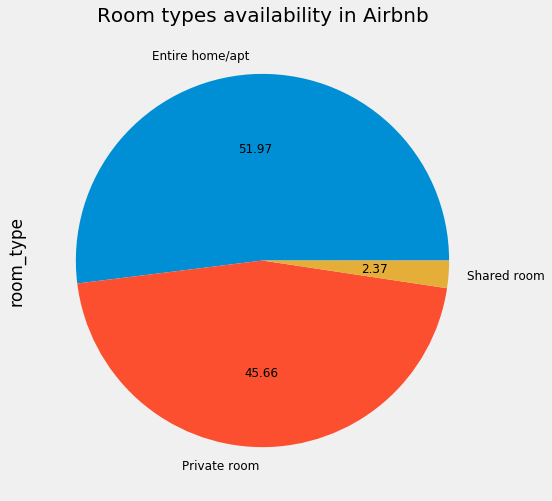

In [77]:
#Let' s check room_type distribution in the whole NYC airbnb.
#pie chart
rt_aver=data.room_type.value_counts()/len(data.room_type)
rt_aver.plot.pie(autopct='%.2f',fontsize=12,figsize=(8,8))
plt.title('Room types availability in Airbnb',fontsize=20)

#### Slightly different with the last figure, in the whole Airbnb market, 'entire home/apt' owns 51.97%, which is higher than that of 'Private room'.

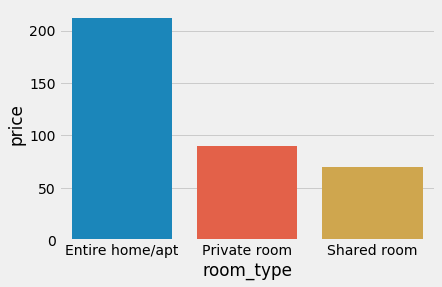

In [84]:
#Let' s check the average price between different room types
rt_price=data.groupby('room_type').price.mean().reset_index()
sns.barplot(x='room_type',y='price',data=rt_price)

#### The average price of 'Entire home/apt'  is the highest one at  \\$211; and 'Shared room' is the lowest one at \\$70.

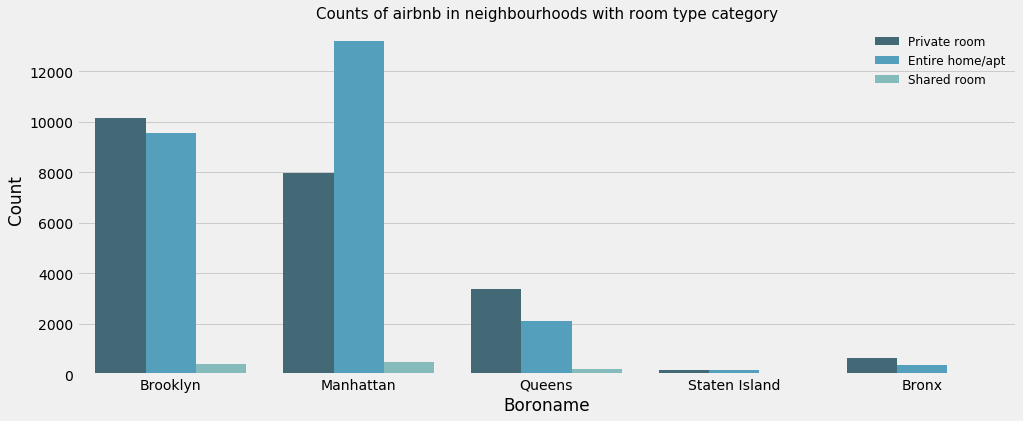

In [75]:
#Let' s check the neighbourhood distribution trend of different room types.
plt.figure(figsize=(15,6))
sns.countplot(data=data, x='boroname', hue='room_type',palette='GnBu_d')
plt.title('Counts of airbnb in neighbourhoods with room type category', fontsize=15)
plt.xlabel('Boroname')
plt.ylabel('Count')
plt.legend(frameon=False, fontsize=12)

#### We can tell 'Manhattan' has the toppest 'Entire home/apt' listings and 'Brooklyn' has the toppest 'Private room' listings; combined with the average price of different room type figure, it can explain why "Manhattan' has  the highest average price at \\$150 and 'Brooklyn' has the average price at \\$90, corresponding with the violin figure of different neighbourhood_group price.